# 1 - Contextualização 

Ocorreu no dia** 7 de outubro de 2018** o primeiro turno das eleições presidenciais no Brasil. Como era de se esperar de um evento dessa magnitude, foram feitas várias pesquisas para levantar estimativas sobre o resultado e saber quais candidatos conseguiriam as melhores performances.

Após a apuração dos votos, o **Tribunal Superior Eleitoral (TSE)** liberou bases de dados com o resultado. Foi adquirido, para essa tarefa, uma base com informações referentes aos votos de **todos os municípios** do Brasil para Presidente; e outra base com informações referentes aos votos dos municípios do estado do Rio Grande do Norte, que será utilizada em trabalho futuro.

O objetivo é analisar os dados contidos nessas bases e gerar gráficos informativos que possam ajudar a tirar conclusões e a inferir informações importantes sobre o cenário político no país. Para isso, utilizarei a linguagem de programação **Python** com o auxílio de bibliotecas e módulos próprios para análise e visualização de dados.

A pesquisa está sendo conduzida por mim, **Lucas Gomes Dantas**, aluno da disciplina de **Probabilidade** lecionada pelo professor doutor **Ivanovitch Medeiros Dantas da Silva** na **Universidade Federal do Rio Grande do Norte**.

# 2 - Configurações iniciais

Antes mesmo de começar a importar bibliotecas e tratar os dados, precisamos... dos dados! Inicialmente verifique se a sua versão do Seaborn é a 0.9.0 ou superior. Caso tenha dúvida, basta executar a célula abaixo:

In [0]:
 !pip3 install seaborn==0.9.0

E agora, importe a base de dados executando:

In [0]:
# Código fornecido pelo Professor Doutor Ivanovitch Medeiros Dantas da Silva
# Suba o arquivo "votacao_candidato_munzona_2018_BR"
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Com isso feito, podemos começar a importar as bibliotecas úteis para a jornada: **[Pandas](https://pandas.pydata.org/://)**, **[NumPy](http://www.numpy.org/)**, **[Matplotlib](https://matplotlib.org/)** e **[Seaborn](https://seaborn.pydata.org/)**. Referências e documentação para as respectivas ferramentas podem ser encontradas nos links anexados ao nome de cada uma.

In [0]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Após a importação, é necessário carregar o arquivo como um dataframe do **Pandas**.

In [3]:
# Lendo o dataset para o Pandas e exibindo as 5 primeiras linhas
candidatos_dataset = pd.read_csv("votacao_candidato_munzona_2018_BR.csv", sep=";", encoding='latin-1')
candidatos_dataset.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,50,PSOL,Partido Socialismo e Liberdade,280000050035,VAMOS SEM MEDO DE MUDAR O BRASIL,PSOL / PCB,4,NÃO ELEITO,N,10
1,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,51,PATRI,Patriota,280000050072,PARTIDO ISOLADO,PATRI,4,NÃO ELEITO,N,33
2,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,691
3,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,5
4,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,45,PSDB,Partido da Social Democracia Brasileira,280000050070,PARA UNIR O BRASIL,PSDB / PTB / PP / PR / DEM / SOLIDARIEDADE / P...,4,NÃO ELEITO,N,1346


São muitas colunas! Porém não se preocupe, para essa análise não utilizaremos todas. Caso se pergunte a informação que cada uma delas contém, o TSE liberou um manual onde essa informação está contida:

* **DT_GERACAO** - Data de extração dos dados para geração dos arquivos;
* **HH_GERACAO** - Hora de extração dos dados para geração dos arquivos (horário de Brasília);
* **ANO_ELEICAO** - Ano da eleição;
* **CD_TIPO_ELEICAO** - Código do tipo de eleição;
* **NM_TIPO_ELEICAO** - Nome do tipo de eleição;
* **NR_TURNO** - Número do turno da eleição;
* **CD_ELEICAO** - Código da eleição;
* **DS_ELEICAO** - Descrição da eleição;
* **DT_ELEICAO** - Data em que ocorreu a eleição;
* **TP_ABRANGENCIA** - Tipo de abrangência da eleição;
* **SG_UF** - Sigla da Unidade da Federação em que ocorreu a eleição;
* **SG_UE** - Sigla da Unidade Eleitoral do candidato (em caso de eleição majoritária é a sigla da UF que o candidato concorre e em caso de eleição municipal é o código TSE do município);
* **NM_UE** - Nome da Unidade Eleitoral do candidato (em caso de eleição majoritária é o nome da UF que o candidato concorre e em caso de eleição municipal é o nome do município);
* **CD_MUNICIPIO** - Código TSE do município onde ocorreu a eleição;
* **NM_MUNICIPIO** - Nome do município onde ocorreu a eleição;
* **NR_ZONA** - Número da Zona Eleitoral onde ocorreu a eleição;
* **CD_CARGO** - Código do cargo do candidato;
* **DS_CARGO** - Descrição do cargo do candidato;
* **SQ_CANDIDATO** - Número sequencial do candidato gerado internamente pelos sistemas eleitorais (não é o número de campanha do candidato).
* **NR_CANDIDATO** - Número do candidato na urna;
* **NM_CANDIDATO** - Nome completo do candidato;
* **NM_URNA_CANDIDATO** - Nome de urna do candidato;
* **NM_SOCIAL_CANDIDATO** - Nome social do candidato;
* **CD_SITUACAO_CANDIDATURA** - Código da situação do registro de candidatura do candidato;
* **DS_SITUACAO_CANDIDATURA** - Descrição da situação do registro de candidatura do candidato (pode assumir os valores 'Apto'	[candidato apto para ir para urna], 'Inapto' [candidato inapto para ir para urna], 'Cadastrado' [registro de candidatura realizada, mas ainda não julgada]);
* **CD_DETALHE_SITUACAO_CAND** - Código do detalhe da situação do registro de candidatura do candidato;
* **DS_DETALHE_SITUACAO_CAND** - Descrição do detalhe da situação do registro de candidatura;
* **TP_AGREMIACAO** - Tipo de agremiação (pode assumir os valores 'Coligação' quando o candidato concorre por coligação e 'Partido isolado' quando o candidato concorre somente pelo partido);
* **NR_PARTIDO** - Número do partido do candidato;
* **SG_PARTIDO** - Sigla do partido do candidato;
* **NM_PARTIDO** - Nome do partido do candidato;
* **SQ_COLIGACAO** - Sequencial da coligação gerado pela Justiça Eleitoral, da qual o candidato pertence;
* **NM_COLIGACAO** - Nome da coligação da qual o candidato pertence;
* **DS_COMPOSICAO_COLIGACAO** - Descrição da composição da coligação da qual o candidato pertence;
* **CD_SIT_TOT_TURNO** - Código da situação de totalização do candidato naquele turno;
* **DS_SIT_TOT_TURNO** - Descrição da situação de totalização do candidato naquele turno;
* **ST_VOTO_EM_TRANSITO** - O indicativo se o quantitativo de votos se refere a voto em trânsito (pode assumir os valores S para Sim e N para Não);
* **QT_VOTOS_NOMINAIS** - Quantidade total de votos nominais do candidato naquele município e zona.







Por último, encerramos a seção configurando a maneira como o Seaborn irá gerar os seus gráficos. Para essa análise, escolhi, por julgar mais adequado, que o fundo das imagens seja branco e o contexto de exibição seja "notebook".

Isso fará com que as cores dos gráficos e a informação que eles desejam passar tenha mais destaque do que outros elementos (plano de fundo, linhas de grade, etc.) presentes.

In [0]:
#Configurando preferências para visualização dos gráficos gerados pelo Seaborn.
sns.set_style("white")
sns.set_context("notebook")

# 3 - Tratando os dados

Antes de começarmos a extrair as informações, precisamos tratar a nossa base de dados. É necessáro saber inicialmente quantos e quais candidatos concorreram, além da quantidade de votos que cada um obteve. Com isso podemos começar a pensar em que tipos de gráficos serão gerados e quais informações podem ser extraídas.

## 3.1 - Candidatos

Para descobrir quantos candidatos concorreram, podemos fazer da seguinte forma:

In [4]:
# Conta quantos candidatos concorreram no primeiro turno
candidatos_dataset["NM_URNA_CANDIDATO"].nunique()

13

Após sabermos que existem 13 candidatos, vamos conhecer seus nomes:

In [5]:
# Exibe o nome de todos os candidatos
candidatos_dataset["NM_URNA_CANDIDATO"].unique()

array(['GUILHERME BOULOS', 'CABO DACIOLO', 'MARINA SILVA',
       'GERALDO ALCKMIN', 'JAIR BOLSONARO', 'CIRO GOMES', 'ALVARO DIAS',
       'JOÃO GOULART FILHO', 'FERNANDO HADDAD', 'JOÃO AMOÊDO',
       'HENRIQUE MEIRELLES', 'EYMAEL', 'VERA'], dtype=object)

Com isso, já podemos fazer a primeira filtragem. Para os próximos gráficos, será necessário conhecer a quantidade de votos que cada candidato obteve por estado (incluindo no exterior, que aparece na base de dados com a sigla ZZ).

Essa informação é obtida através da criação de uma tabela pivô que será armazenada no dataframe **presidentes_por_estado**.

In [0]:
# Cria um dataframe classificando os votos dos candidatos por estado
candidatos_por_estado = candidatos_dataset.pivot_table(
  index=["NM_URNA_CANDIDATO", "SG_UF"],
  values="QT_VOTOS_NOMINAIS",
  aggfunc=np.sum
)

# Reinicia o index por facilidade de referências futuras
candidatos_por_estado = candidatos_por_estado.reset_index()

## 3.2 - Cores

A partir das próximas seções começaremos a gerar gráficos. É muito importante que agora escolhamos a nossa paleta de cores, de preferência uma que possa ser visualizada por pessoas que possuem Daltonismo.

Como já verificamos, existem 28 estados (contando com ZZ) e 13 candidatos. Sendo assim, precisaremos ter uma quantidade de cores suficiente para lidar com essas informações. Extraí cores para a paleta através das anotações e dicas disponíveis em [Paul Tol's Notes](https://personal.sron.nl/~pault/) e criei duas listas (uma para a paleta com 13 cores e outra para a com 28).

In [0]:
# Paleta com 13 cores amigáveis para daltônicos
paleta_13 = [
    '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677',
    '#882255', '#AA4499', '#DDDDDD', '#EE7733', '#CC3311', '#EE3377'
]

# Paleta com 28 cores amigáveis para daltônicos
paleta_28 = [
    '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677',
    '#882255', '#AA4499', '#DDDDDD', '#EE7733', '#CC3311', '#EE3377', '#000000',
    '#004488', '#FFB000', '#648FFF', '#FFEE99', '#5AAE61', '#9970AB', '#662506',
    '#AE76A3', '#BEBC48', '#4E79C5', '#E67932', '#222255', '#666633', '#663333'
]

## 3.3 Resultado por candidato

Com as informações básicas classificadas, podemos gerar o primeiro gráfico. Com ele é possível "sentir" como os votos estão concentrados e a partir disso orientar as próximas visualizações. 

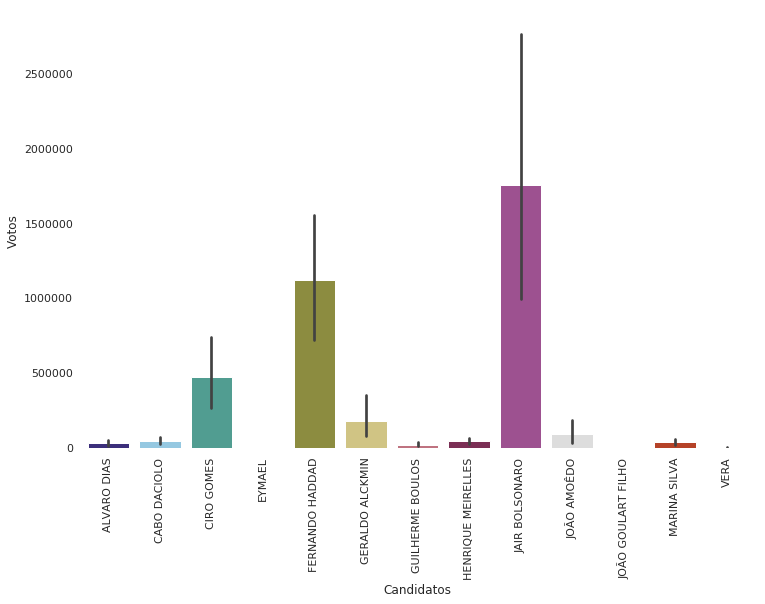

In [7]:
# Cria um gráfico contendo a quantidade de votos que cada candidato obteve
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

# Plota um gráfico com a quantidade total de votos por candidato
ax = sns.barplot(
    x="NM_URNA_CANDIDATO",
    y="QT_VOTOS_NOMINAIS",
    data=candidatos_por_estado,
    palette=paleta_13
)

# Remove todas as colunas laterais
sns.despine(left=True, bottom=True)

# Rotaciona o nome dos candidatos nomeia os eixos
plt.xticks(rotation=90)
plt.xlabel("Candidatos")
plt.ylabel("Votos")

# Gera o gráfico
plt.show()

Com esse gráfico temos apenas uma rápida visualização do resultado do primeiro turno das eleições. Como é possível observar, os candidatos Ciro Gomes, Fernando Haddad e Jair Bolsonaro foram os três com o maior número de votos. Eymael, João Goulart Filho e Vera, porém, não obteram um valor significativo (comparado com a escala dos demais).

Percebe-se também que a diferença de votos no top 3 não é sutil (principalmente entre o primeiro e o segundo). Iremos, com os próximos gráficos, visualizar o desempenho individual dos candidatos em cada estado, podendo identificar quais foram seus maiores colégios eleitorais.

#4 - Votos dos candidatos por estado

Como dito na seção anterior, vamos analisar agora o desempenho individual dos candidatos por estado (incluindo votos no exterior, que possuem a sigla ZZ).

Já evidenciamos também que o número de votos entre os candidatos diferente bastante: apenas fora do top 3 é que temos votos flutuando aproximadamente na mesma escala. Por causa disso, procurei uma forma de normalizar essa quantidade. Escolhi calcular a quantidade total de votos por estado e depois verificar qual a porcentagem desses votos os candidatos (individualmente) obtiveram.

O primeiro passo é, então, descobrir qual a quantidade de votos cada estado teve.

In [8]:
# Cria um dataframe com a quantidade de votos por estado
votos_estado = candidatos_dataset.pivot_table(index="SG_UF", values="QT_VOTOS_NOMINAIS", aggfunc=np.sum)
votos_estado = votos_estado.rename(columns={'QT_VOTOS_NOMINAIS': 'TOTAL_VOTOS'})
votos_estado

,TOTAL_VOTOS
SG_UF,
AC,421778
AL,1535746
AM,1853591
AP,409757
BA,7368545
CE,4880155
DF,1604517
ES,2049148
GO,3264789


Agora, para facilitar o cálculo da porcentagem, decidi concatenar os valores de **votos_estado** com os dados contidos em **candidatos_por_estado**.

In [9]:
# Concatena colunas para calcular a porcentagem dos votos por estado
candidatos_por_estado = pd.concat([candidatos_por_estado.set_index("SG_UF"), votos_estado], axis=1, join='inner')
candidatos_por_estado

,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,TOTAL_VOTOS
SG_UF,,,
AC,ALVARO DIAS,1531,421778
AL,ALVARO DIAS,5128,1535746
AM,ALVARO DIAS,8589,1853591
AP,ALVARO DIAS,1435,409757
BA,ALVARO DIAS,20838,7368545
CE,ALVARO DIAS,8142,4880155
DF,ALVARO DIAS,11138,1604517
ES,ALVARO DIAS,11352,2049148
GO,ALVARO DIAS,15628,3264789


Finalmente podemos calcular a porcentagem total de votos no estado que cada candidato obteve:

In [10]:
# Calcula a porcentagem de votos que cada candidato obteve por estado
candidatos_por_estado = candidatos_por_estado.assign(
    PORCENTAGEM_VTS_ESTADO=lambda x:round(100 * x["QT_VOTOS_NOMINAIS"]/x["TOTAL_VOTOS"],2)
)

# Exclui a coluna que foi utilizada para o cálculo, visto que suas informações podem confundir futuramente
candidatos_por_estado = candidatos_por_estado.drop(['TOTAL_VOTOS'], axis=1).reset_index()

candidatos_por_estado

,SG_UF,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,PORCENTAGEM_VTS_ESTADO
0,AC,ALVARO DIAS,1531,0.36
1,AL,ALVARO DIAS,5128,0.33
2,AM,ALVARO DIAS,8589,0.46
3,AP,ALVARO DIAS,1435,0.35
4,BA,ALVARO DIAS,20838,0.28
5,CE,ALVARO DIAS,8142,0.17
6,DF,ALVARO DIAS,11138,0.69
7,ES,ALVARO DIAS,11352,0.55
8,GO,ALVARO DIAS,15628,0.48
9,MA,ALVARO DIAS,6320,0.19


Por último, geramos os gráficos para conhecer o desempenho individual de cada candidato.

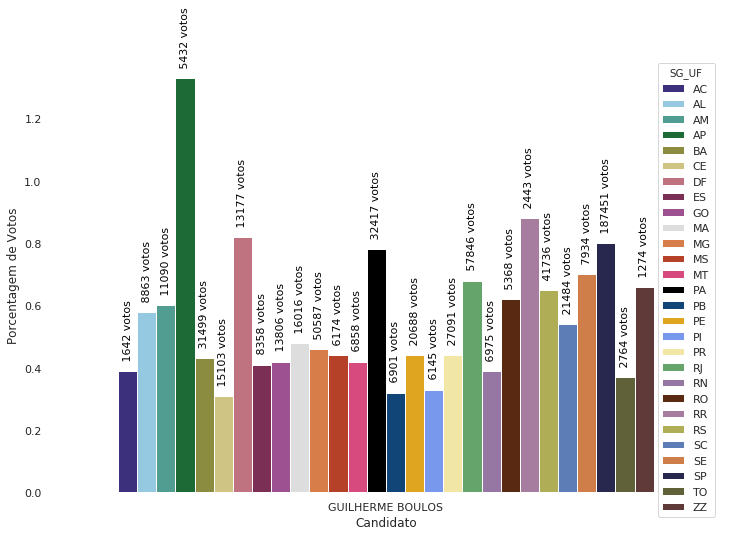

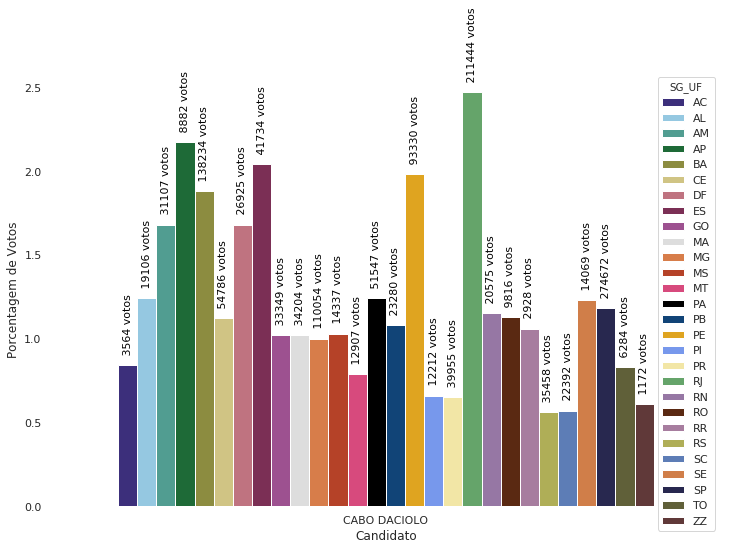

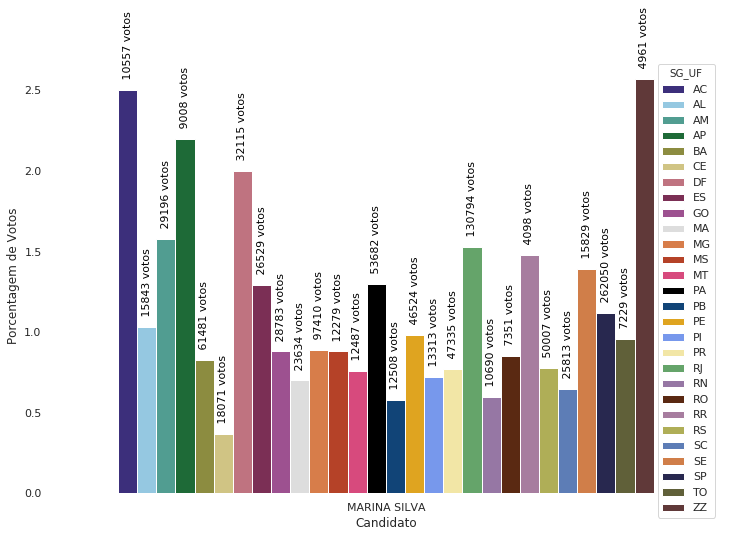

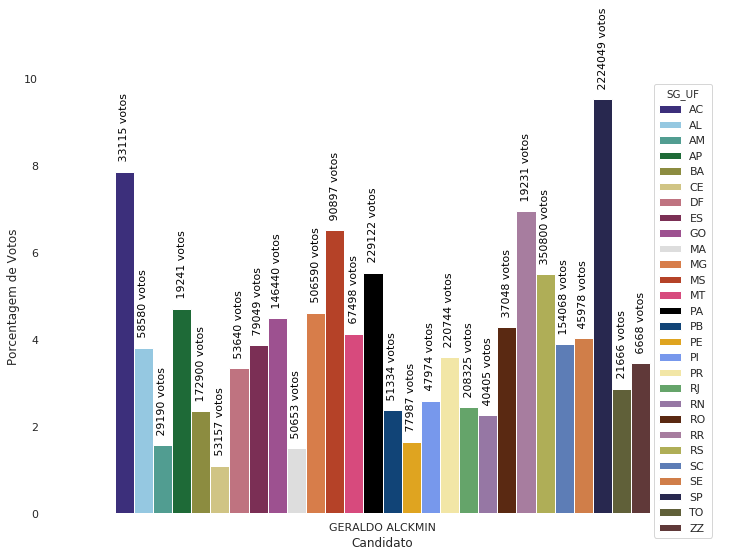

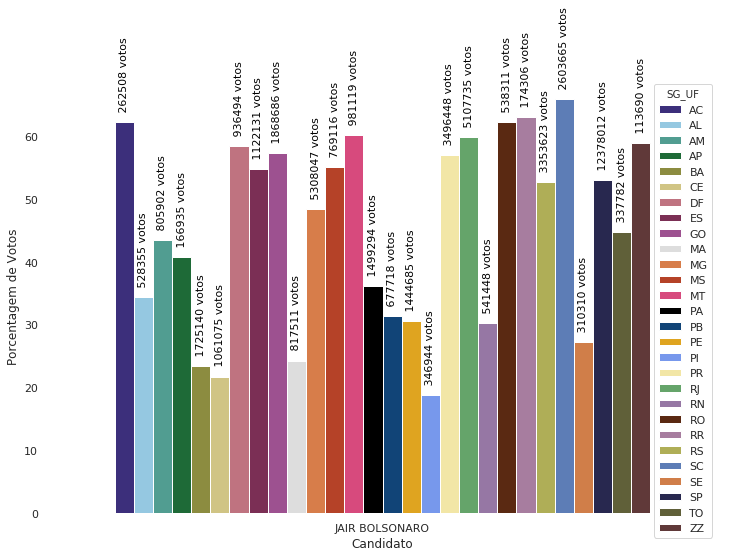

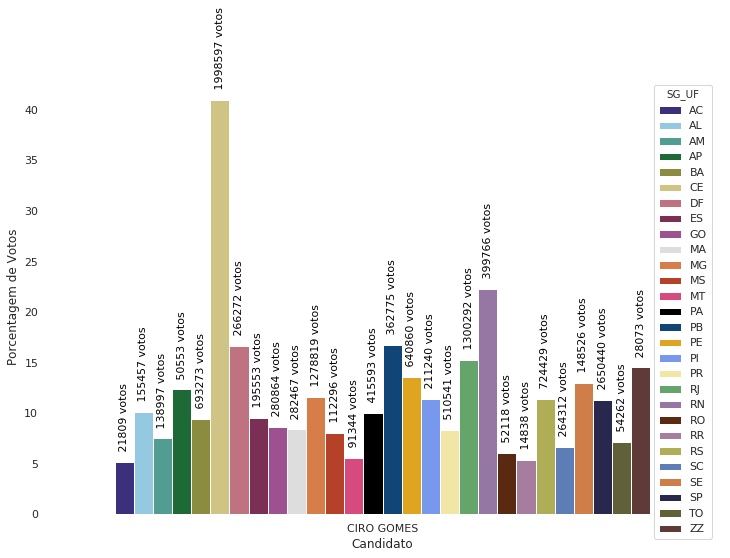

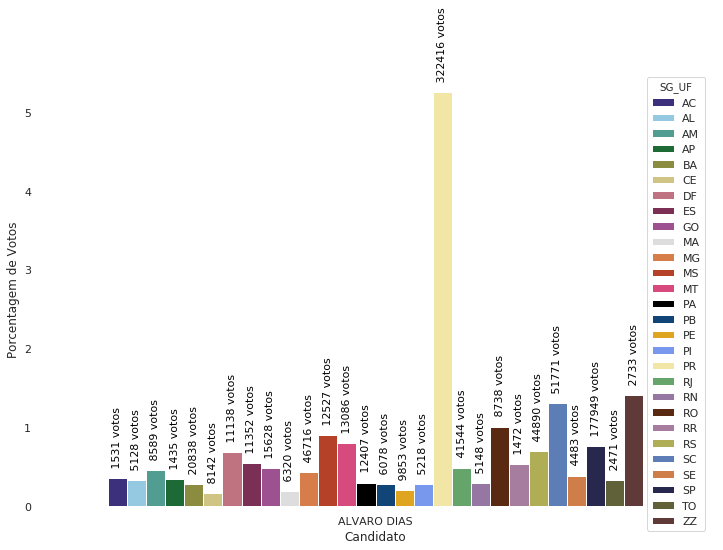

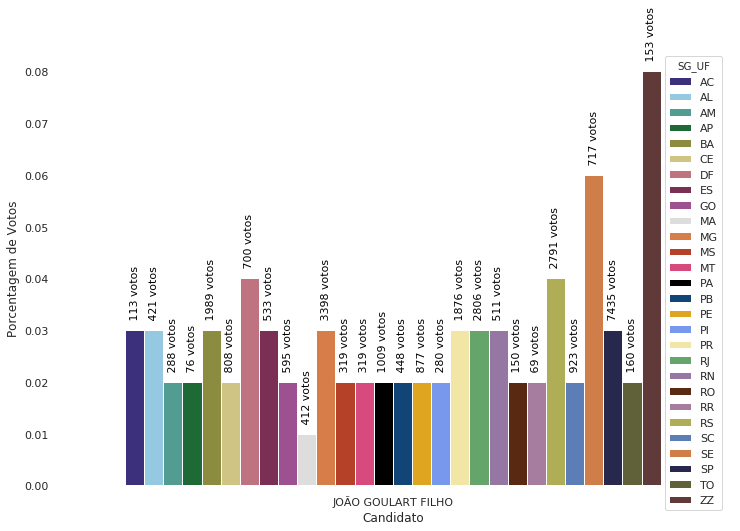

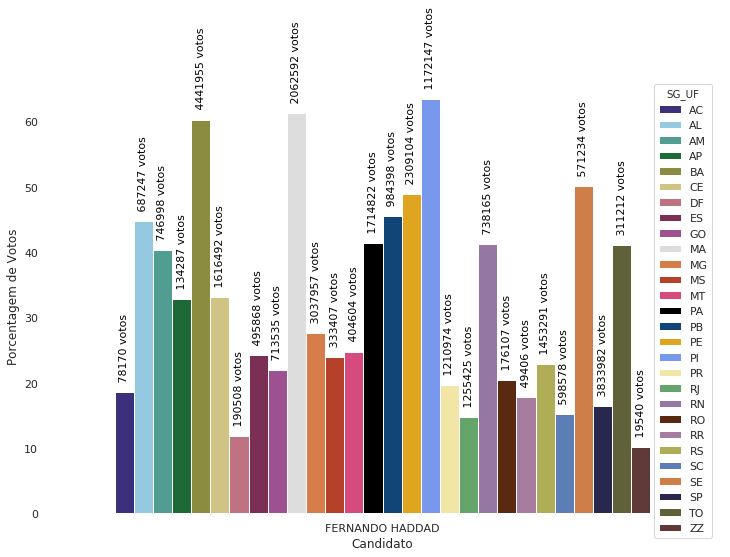

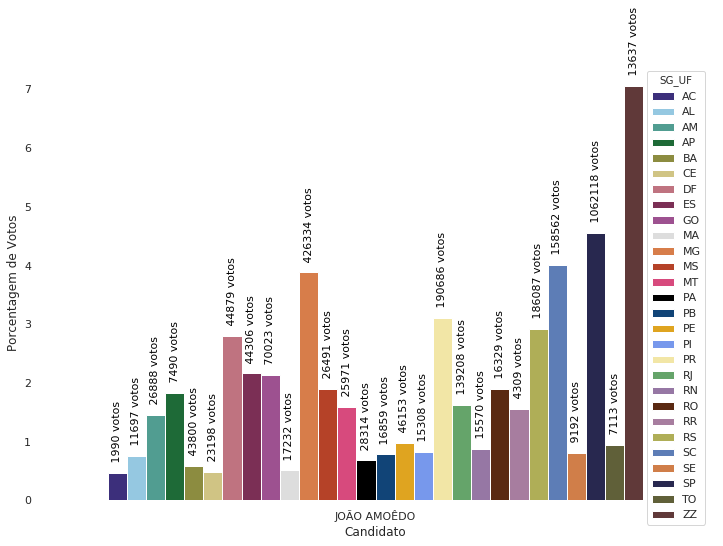

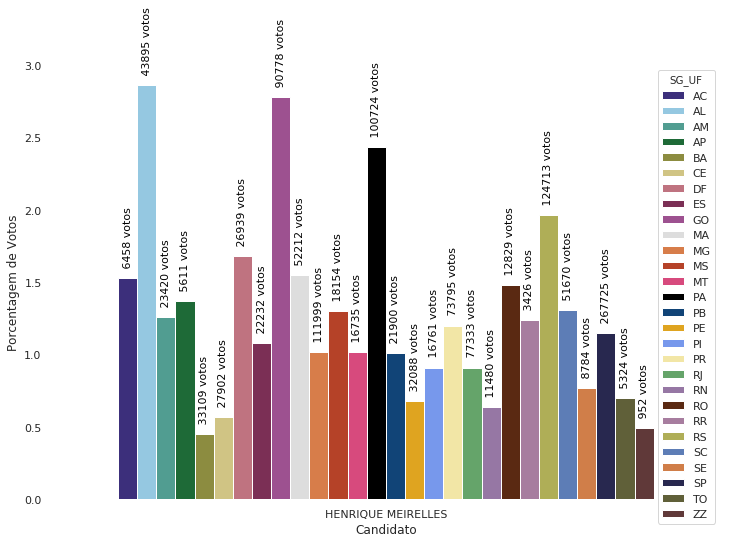

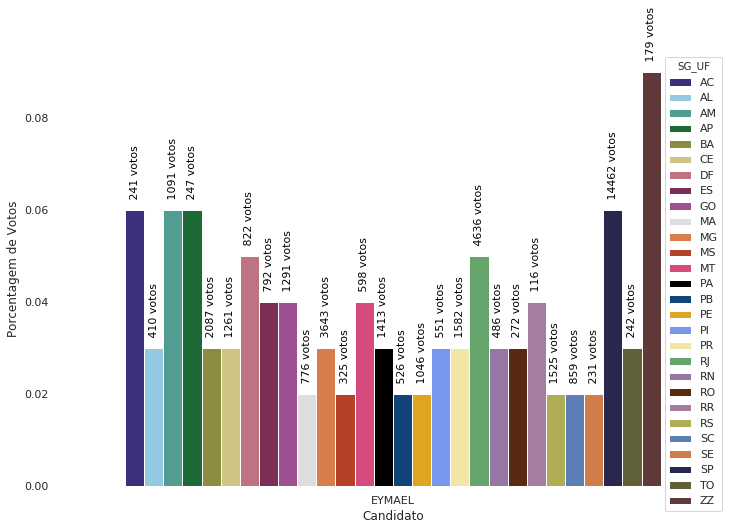

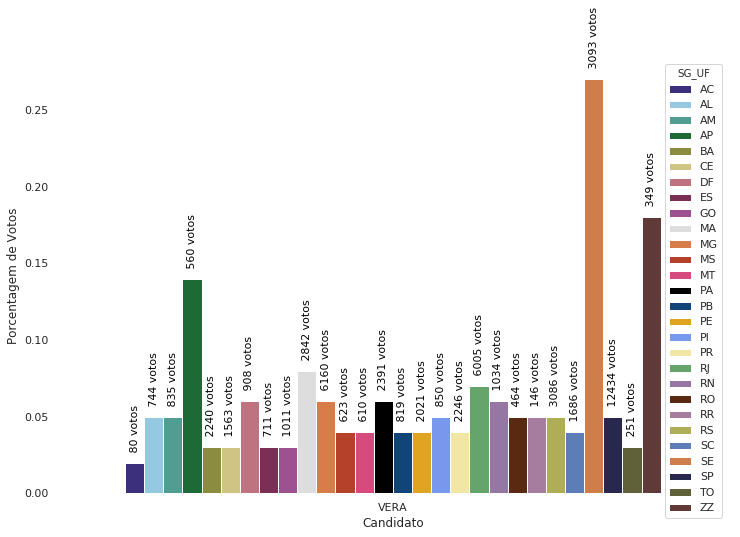

In [11]:
# Gera gráficos para ver o desempenho de cada candidato por estado
for candidato in candidatos_dataset["NM_URNA_CANDIDATO"].unique():
  fig = plt.figure(figsize=(12,8))
  plt.tight_layout()
  candidato_estado = candidatos_por_estado[candidatos_por_estado["NM_URNA_CANDIDATO"] == candidato]
  ax = sns.barplot(
    x="NM_URNA_CANDIDATO",
    y="PORCENTAGEM_VTS_ESTADO",
    hue="SG_UF",
    data=candidato_estado,  
    palette=paleta_28
  )
  
  votos_list = list(candidato_estado["QT_VOTOS_NOMINAIS"].values.flatten())
  count = 0
  
  # Cria anotações para que em cima de cada barra tenha a quantidade nominal de votos
  for i in ax.patches:
    text = "   {} votos".format(votos_list[count])
    ax.text(
        i.get_x() + i.get_width()/2.0,
        i.get_height(),
        text, color='black', ha="center", va='bottom', rotation=90,
        fontsize=11
    )
    count += 1 
  
  sns.despine(left=True, bottom=True)
  plt.xlabel("Candidato")
  plt.ylabel("Porcentagem de Votos")
  plt.show()

Com esses gráficos podemos visualizar o desempenho de cada um dos candidatos por estado e ver a quantidade nominal que essa porcentagem representa em votos. Note que a escala entre as imagens varia, principalmentre as do grupo "Jair Bolsonaro - Fernando Haddad - Ciro Gomes" para os demais.

De toda forma, me parece informação demais (e informação dispersa) o que é apresentado aqui. Como uma solução para esse problema, decidi "clusterizar" (ou categorizar) os estados em suas respectivas regiões.

# 5 - Candidatos por região

Seguindo com a proposta de categorizar as informações por região, decidi gerar informativos apenas dos três candidatos com o melhor percentual de votos, nosso já conhecido top 3: Fernando Haddad, Ciro Gomes e Jair Bolsonaro.

O primeiro passo é categorizar os estados por região, e isso é feito da seguinte forma:

In [12]:
# Criando um dicionário com a região atribuída a cada estado
estado_regioes={
    'AC': ['NORTE'],
    'AL': ['NORDESTE'],
    'AM': ['NORTE'],
    'AP': ['NORTE'],
    'BA': ['NORDESTE'],
    'CE': ['NORDESTE'],
    'DF': ['CENTRO-OESTE'],
    'ES': ['SUDESTE'],
    'GO': ['CENTRO-OESTE'],
    'MA': ['NORDESTE'],
    'MG': ['SUDESTE'],
    'MS': ['CENTRO-OESTE'],
    'MT': ['CENTRO-OESTE'],
    'PA': ['NORTE'],
    'PB': ['NORDESTE'],
    'PE': ['NORDESTE'],
    'PI': ['NORDESTE'],
    'PR': ['SUL'],
    'RJ': ['SUDESTE'],
    'RN': ['NORDESTE'],
    'RO': ['NORTE'],
    'RR': ['NORTE'],
    'RS': ['SUL'],
    'SC': ['SUL'],
    'SE': ['NORDESTE'],
    'SP': ['SUDESTE'],
    'TO': ['NORTE'],
    'ZZ': ['EXTERIOR']
}

# Criando um dataframe a partir da lista de estados/regiões
regioes = pd.DataFrame.from_dict(estado_regioes).T.rename(columns={0: 'REGIAO'}).reset_index().rename(columns={'index': 'SG_UF'}).set_index('SG_UF')
regioes

,REGIAO
SG_UF,
AC,NORTE
AL,NORDESTE
AM,NORTE
AP,NORTE
BA,NORDESTE
CE,NORDESTE
DF,CENTRO-OESTE
ES,SUDESTE
GO,CENTRO-OESTE


Agora, podemos concatenar as colunas para conhecer também, além do estado, a região do voto. 

In [13]:
# Concatena as colunas para adicionar informação de região
candidatos_por_estado = pd.concat([candidatos_por_estado.set_index('SG_UF'), regioes], axis=1, join='inner')
candidatos_por_estado = candidatos_por_estado.reset_index()
candidatos_por_estado.head()

,SG_UF,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,PORCENTAGEM_VTS_ESTADO,REGIAO
0,AC,ALVARO DIAS,1531,0.36,NORTE
1,AL,ALVARO DIAS,5128,0.33,NORDESTE
2,AM,ALVARO DIAS,8589,0.46,NORTE
3,AP,ALVARO DIAS,1435,0.35,NORTE
4,BA,ALVARO DIAS,20838,0.28,NORDESTE


Porém, é necessário ainda saber a porcentagem que aqueles votos representam na região. Isso é feito da seguinte forma:

In [14]:
# Cria um dataframe com a quantidade de votos por região
votos_regiao = candidatos_por_estado.pivot_table(index="REGIAO", values="QT_VOTOS_NOMINAIS", aggfunc=np.sum)
votos_regiao = votos_regiao.rename(columns={'QT_VOTOS_NOMINAIS': 'TOTAL_VOTOS_REGIAO'})
votos_regiao

,TOTAL_VOTOS_REGIAO
REGIAO,
CENTRO-OESTE,7900387
EXTERIOR,193381
NORDESTE,28823653
NORTE,8726310
SUDESTE,44933034
SUL,16473908


Concatenando mais uma vez as informações para visualizar e calcular a porcentagem:

In [15]:
# Cria um novo conjunto de dados contendo a quantidade de votos do candidato por região
candidatos_por_regiao = candidatos_por_estado.pivot_table(
    index=["NM_URNA_CANDIDATO", "REGIAO"], values="QT_VOTOS_NOMINAIS", aggfunc=np.sum
)

candidatos_por_regiao = candidatos_por_regiao.reset_index()

# Concatena com a quantidade total de votos por região
candidatos_por_regiao = pd.concat([candidatos_por_regiao.set_index("REGIAO"), votos_regiao], axis=1, join='inner')

# Calcula a porcentagem desses votos em relação ao total 
candidatos_por_regiao = candidatos_por_regiao.assign(
    PORCENTAGEM_VTS_REGIAO=lambda x:round(100 * x["QT_VOTOS_NOMINAIS"]/x["TOTAL_VOTOS_REGIAO"],2)
)

# Exclui a coluna que foi utilizada para o cálculo, visto que suas informações podem confundir futuramente
candidatos_por_regiao = candidatos_por_regiao.drop(['TOTAL_VOTOS_REGIAO'], axis=1).reset_index()

candidatos_por_regiao

,REGIAO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,PORCENTAGEM_VTS_REGIAO
0,CENTRO-OESTE,ALVARO DIAS,52379,0.66
1,EXTERIOR,ALVARO DIAS,2733,1.41
2,NORDESTE,ALVARO DIAS,71208,0.25
3,NORTE,ALVARO DIAS,36643,0.42
4,SUDESTE,ALVARO DIAS,277561,0.62
5,SUL,ALVARO DIAS,419077,2.54
6,CENTRO-OESTE,CABO DACIOLO,87518,1.11
7,EXTERIOR,CABO DACIOLO,1172,0.61
8,NORDESTE,CABO DACIOLO,409796,1.42
9,NORTE,CABO DACIOLO,114128,1.31


Com os dados prontos, podemos plotar gráficos para ver a posição dos três candidatos com a maior quantidade de votos classificados por região.

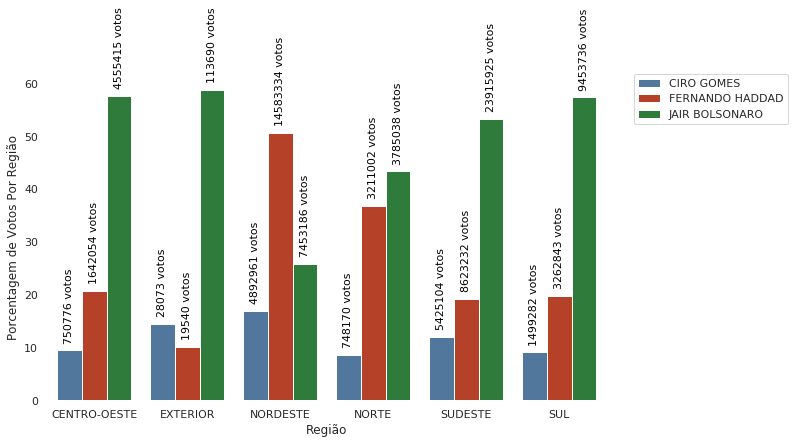

In [63]:
# Criando gráfico de votos por região (porcentagem) para os três candidatos com mais votos
fig = plt.figure(figsize=(10,6))
plt.tight_layout()

# Selecionando os candidatos
haddad = candidatos_por_regiao[candidatos_por_regiao["NM_URNA_CANDIDATO"] == "FERNANDO HADDAD"]
bolsonaro = candidatos_por_regiao[candidatos_por_regiao["NM_URNA_CANDIDATO"] == "JAIR BOLSONARO"]
ciro = candidatos_por_regiao[candidatos_por_regiao["NM_URNA_CANDIDATO"] == "CIRO GOMES"]
candidatos_selecionados = [ciro, haddad, bolsonaro]
top3 = pd.concat(candidatos_selecionados)

# Cria uma paleta de cores especial para o top 3, amigável para daltônicos
top3_paleta = ["#4477AA", "#CC3311", "#228833"]

# Gerando o gráfico
ax = sns.barplot(
    x="REGIAO", y="PORCENTAGEM_VTS_REGIAO", hue="NM_URNA_CANDIDATO",
    data=top3, palette=top3_paleta
)

# Coletando informações textuais
count = 0
top3_votos = []
top3_votos.extend(list(ciro["QT_VOTOS_NOMINAIS"].values.flatten()))
top3_votos.extend(list(haddad["QT_VOTOS_NOMINAIS"].values.flatten()))
top3_votos.extend(list(bolsonaro["QT_VOTOS_NOMINAIS"].values.flatten()))

# Gerando anotações sobre a quantidade de votos
for i in ax.patches:
    text = "  {} votos".format(top3_votos[count])
    ax.text(
        i.get_x() + i.get_width()/2.0,
        i.get_height(),
        text, color='black', ha="center", va='bottom', rotation=90,
        fontsize=11
    )
    count += 1

# Configurando labels, legenda e mostrando o gráfico na tela    
sns.despine(left=True, bottom=True)
plt.xlabel("Região")
plt.ylabel("Porcentagem de Votos Por Região")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Com essa informações, podemos tentar inferir algumas coisas. O Censo 2010 do [IBGE](https://censo2010.ibge.gov.br/sinopse/index.php?dados=12) contém informações referentes a **faixa etária** da população por região.

Analisando o Nordeste, região onde o candidato Fernando Haddad teve sua maior quantidade de votos, vemos o seguinte (gráfico extraído do IBGE, já referenciado):

![Faixa etária do Nordeste, IBGE 2010](https://github.com/vertumno/partenon/blob/master/assets/Distribui%C3%A7%C3%A3o%20-%20Nordeste.png?raw=true)

E comparando com o Sudeste, onde o candidato Jair Bolsonaro teve a maioria (gráfico extraído do IBGE, já referenciado):

![Faixa etária do Sudeste, IBGE 2010](https://github.com/vertumno/partenon/blob/master/assets/Distribui%C3%A7%C3%A3o%20-%20Sudeste.png?raw=true)

É possível notar que a faixa etária de ambas as regiões não diverge completamente, porém o Sudeste contém uma população mais velha, enquanto o Nordeste possui mais jovens.

Comparando** índices de educação e analfabetismos** (extração vinda [dessa parte](https://censo2010.ibge.gov.br/sinopse/index.php?dados=P6&uf=00) do Censo de 2010), vejamos se há alguma discrepância:

![Alfabetizados Brasil, IBGE 2010](https://github.com/vertumno/partenon/blob/master/assets/Distribui%C3%A7%C3%A3o%20-%20Alfabetizados.png?raw=true)

É possível observar quesito de alfabetização, houve uma polarização (não desconhecida para quem mora no Brasil) entre o Sudeste (com menores índices de analfabetismo) e o Nordeste (sendo um dos campões do Brasil em analfabetismo).

É necessário salientar que são áreas bem distintas, com economias e cargas sociais/históricas diferentes. Não se pode atribuir o fato do candidato A ter mais votos do que o B analisando apenas faixa etária e analfabetismo.

Para um estudo mais aprofundado sobre as causas que fizeram um candidato ter mais votos que o outro precisamos analisar dados de cunho histórico e social. Atráves disso podemos identificar padrões e tecer um panorama sobre os cenários vividos no Brasil.

# 6 - Conclusão

A quantidade de trabalho que ainda tem de ser feita é bem maior da que realmente foi entregue. Inicialmente houveram dificuldades com a base de dados, como tratar suas informações e entender o que cada valor representava. Como o professor deixou os tópicos a serem pesquisados na base a cargo dos alunos, gastei muito tempo também planejando o que extrair e como extrair, além de me perguntar como iria gerar a visualização da melhor maneira possível.

Aprendi muito durante todo o processo, vendo o quanto é árduo tratar os dados e tecer conclusões em cima dos seus resultados (uma parte extremamente crítica do processo).